# Assignment 2 - Image Enhancement

In [15]:
import cv2
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from utils import convert_images

In [16]:
images = []
data_src = Path("data")

for img in data_src.iterdir():
    images.append(cv2.imread(str(img)))

images = np.array(images)

In [17]:
rgb_images = convert_images(images, cv2.COLOR_BGR2RGB)
lab_images = convert_images(images, cv2.COLOR_BGR2Lab)

In [18]:
def mouse_callback(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        print(f"Left button clicked at ({x}, {y})")

In [19]:
cv2.imshow("Image", images[0])
cv2.setMouseCallback('Image', mouse_callback)
cv2.waitKey(0)
cv2.destroyAllWindows()

Left button clicked at (790, 505)


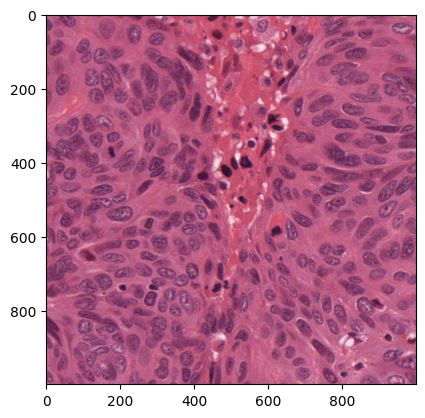

In [20]:
plt.imshow(rgb_images[0])

(500.0, 510.0)

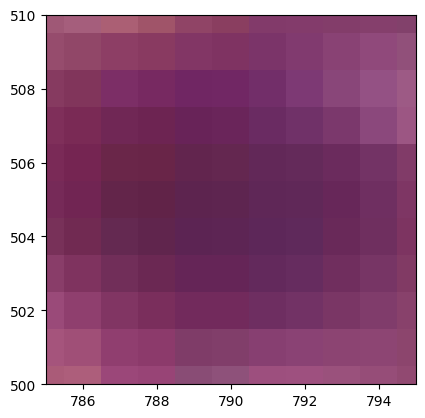

In [21]:
plt.imshow(rgb_images[0])
plt.xlim([785, 795])
plt.ylim([500, 510])

In [22]:
split_lab_img = cv2.split(lab_images[0])
L_ch_nucleus = split_lab_img[0][785:796, 500:511]
a_ch_nucleus = split_lab_img[1][785:796, 500:511]
b_ch_nucleus = split_lab_img[2][785:796, 500:511]

print(L_ch_nucleus.shape)
print(a_ch_nucleus.shape)
print(b_ch_nucleus.shape)

(11, 11)
(11, 11)
(11, 11)


In [23]:
L_mean_nucleus = np.mean(L_ch_nucleus)
a_mean_nucleus = np.mean(a_ch_nucleus)
b_mean_nucleus = np.mean(b_ch_nucleus)

print(L_mean_nucleus, a_mean_nucleus, b_mean_nucleus)

101.0 166.83471074380165 122.72727272727273


In [24]:
delta_L = split_lab_img[0] - L_mean_nucleus
delta_a = split_lab_img[1] - a_mean_nucleus
delta_b = split_lab_img[2] - b_mean_nucleus

print(np.min(delta_L), np.min(delta_a), np.min(delta_b))
print(np.max(delta_L), np.max(delta_a), np.max(delta_b))

-81.0 -37.83471074380165 -39.727272727272734
140.0 20.16528925619835 32.272727272727266


In [25]:
new_range = 255

delta_L_old_range = np.max(delta_L) - np.min(delta_L)
delta_L = ((delta_L - np.min(delta_L)) * new_range) / delta_L_old_range

delta_a_old_range = np.max(delta_a) - np.min(delta_a)
delta_a = ((delta_a - np.min(delta_a)) * new_range) / delta_a_old_range

delta_b_old_range = np.max(delta_b) - np.min(delta_b)
delta_b = ((delta_b - np.min(delta_b)) * new_range) / delta_b_old_range

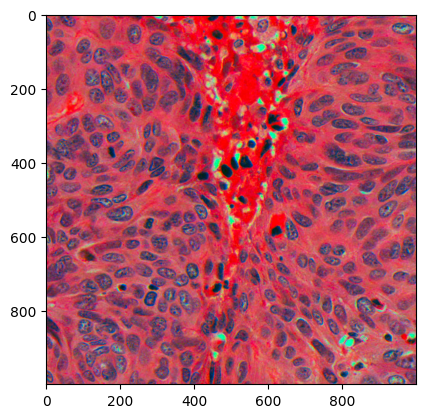

In [26]:
lab_img_new = cv2.merge([delta_L, delta_a, delta_b]).astype(np.uint8)
rgb_img_new = cv2.cvtColor(lab_img_new, cv2.COLOR_Lab2RGB)
plt.imshow(rgb_img_new)

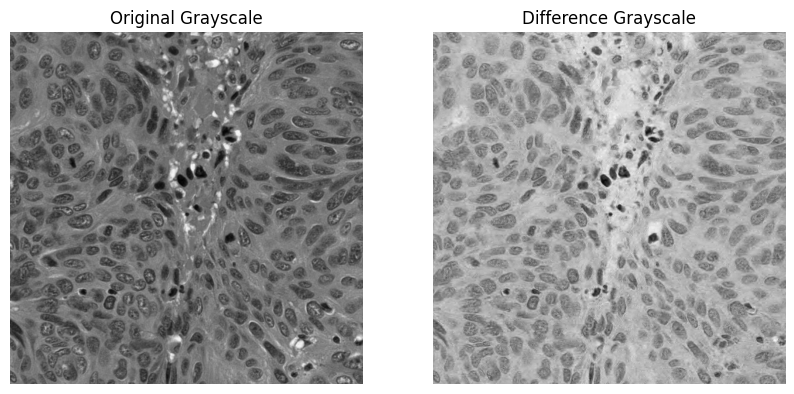

In [27]:
gray_img = cv2.cvtColor(lab_img_new, cv2.COLOR_RGB2GRAY)

rows = 1
columns = 2

fig = plt.figure(figsize=(10, 5))

fig.add_subplot(rows, columns, 1)
plt.axis("off")
plt.title("Original Grayscale")
plt.imshow(cv2.cvtColor(images[0], cv2.COLOR_BGR2GRAY), cmap="gray")

fig.add_subplot(rows, columns, 2)
plt.axis("off")
plt.title("Difference Grayscale")
plt.imshow(gray_img, cmap="gray")